<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/case_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
dataset = '/content/drive/MyDrive/Colab Notebooks/SUV_Purchase.csv'
data = pd.read_csv(dataset)

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


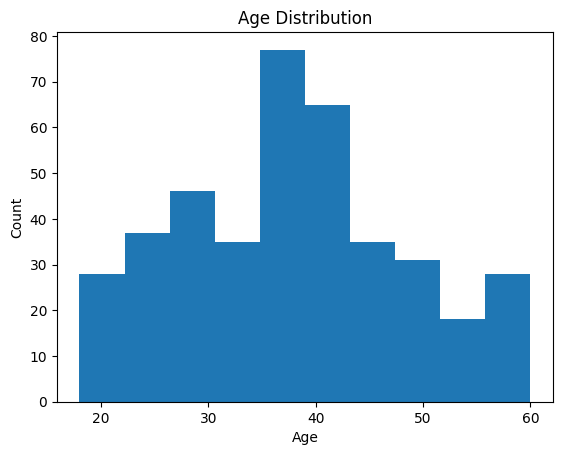

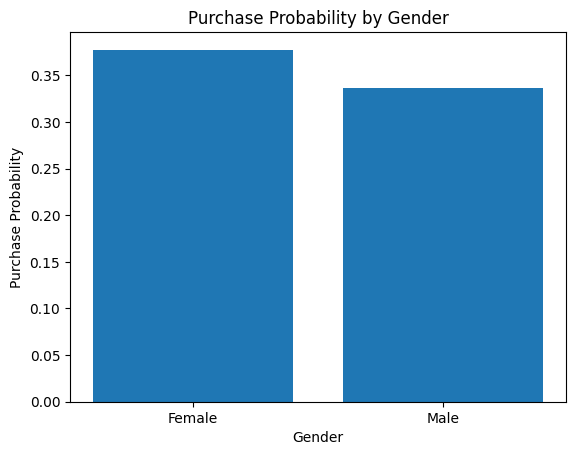

In [7]:
import matplotlib.pyplot as plt

# Visualize the distribution of age
plt.hist(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Visualize the purchase status by gender
purchase_by_gender = data.groupby('Gender')['Purchased'].mean()
plt.bar(purchase_by_gender.index, purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability by Gender')
plt.show()


In [9]:
data.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

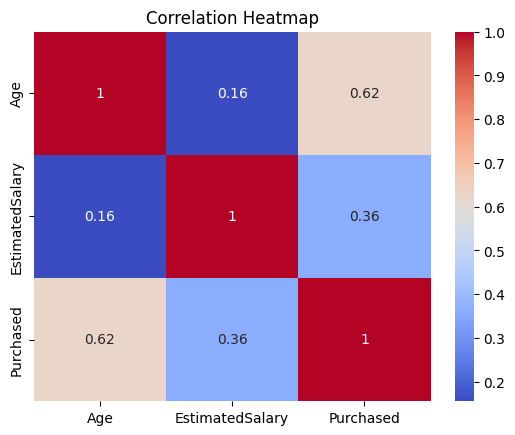

In [10]:
import seaborn as sns

# Select the columns with numerical data
numeric_columns = ['Age', 'EstimatedSalary', 'Purchased']

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
'''Before splitting the data and training a model, it's often necessary to preprocess the data.
This may include handling missing values, encoding categorical variables, or scaling numerical features.
The specific preprocessing steps depend on your dataset and the machine learning algorithm you plan to use.'''

In [14]:
#preprocessing the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split the data into train and test sets
X = data.drop('Purchased', axis=1)
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [26]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
X_train

In [16]:
#training the model
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and display the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ')
print(confusion)


Accuracy: 0.7375
Confusion Matrix:
[[52  3]
 [18  7]]


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = model.score(X,y)*100

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Model Score:", model_score)

Mean Squared Error (MSE): 0.2625
Mean Absolute Error (MAE): 0.2625
R-squared (R2): -0.22181818181818191
Model Score: 78.5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution plot of actual vs. predicted values
sns.kdeplot(y_test, label='Actual Values')
sns.kdeplot(y_pred, label='Predicted Values')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('Distribution Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

# Heatmap of correlation matrix
corr = data.corr()  # assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Model Score:", model_score)


In [27]:
model.coef_

array([[-1.55882862e-07, -9.70635135e-12,  1.19981946e-08,
         2.57060214e-05]])